## Table of Contents:
* [Dataset](#dataset)
* [Data Imputation](#data-imputation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

## Dataset <a class="anchor" id="dataset"></a>

In [3]:
#train = pd.read_csv('/Users/MWojnowskyj/Desktop/J/data/titanic/train.csv')
train = pd.read_csv('/Users/mw/Desktop/AI/ML/kaggle/titanic/data/train.csv')

In [4]:
#test_x = pd.read_csv('/Users/MWojnowskyj/Desktop/J/data/titanic/test.csv')
#test = pd.read_csv('/Users/MWojnowskyj/Desktop/J/data/titanic/gender_submission.csv')
test_x = pd.read_csv('/Users/mw/Desktop/AI/ML/kaggle/titanic/data/test.csv')
test = pd.read_csv('/Users/mw/Desktop/AI/ML/kaggle/titanic/data/gender_submission.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
# get feature data types and check for missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


<Axes: >

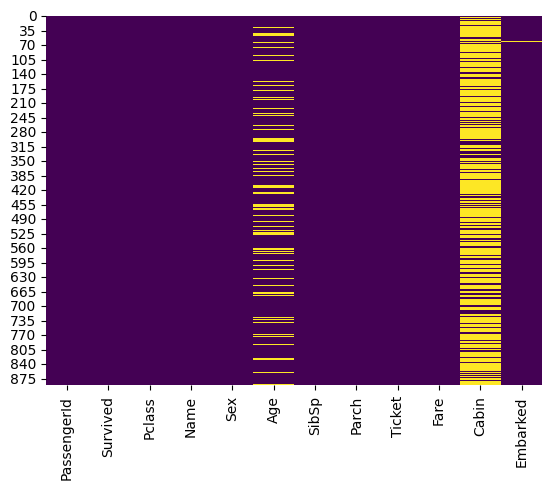

In [11]:
#visualize missing values using heatmap
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

## Data Imputation <a class="anchor" id="data-inputation"></a>

The Cabin feature represents the cabin number a passenger lived in. If the value is NaN then we know that the passanger did not have a assigned cabin. 

Since the current Cabin values and NaN are not numeric values, they need to be transformed. 

Seeing the amount of unique cabin values will let us know how to transform the data:

If there are few cabin values (something like less than 10) then we can assign some kind of numeric ordered value to each cabin value and then assign the non-cabin passengers a seperate numeric value. 

If there are much more unique cabin values then we can assume there is not much ordering/advantage between having specific cabins so we can tranform the feature to a binary value of has-cabin and doesnt.

In [12]:
print('Unique cabin values:', train['Cabin'].nunique())
print('First 10 unique cabin values:', train['Cabin'].unique().tolist()[:10])

Unique cabin values: 147
First 10 unique cabin values: [nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78']


Given that the number of unique cabin values are 147 it can be assumed that each unique cabin value will not provide much extra information on a passangers survival chances. 

The cabin numbers could be seperated into a couple categories based on the passangers mean price to see if we receive an increase in performance. If there is not much of an improvment then we can go with the standard binary transformation of 0=No cabin, 1=cabin.

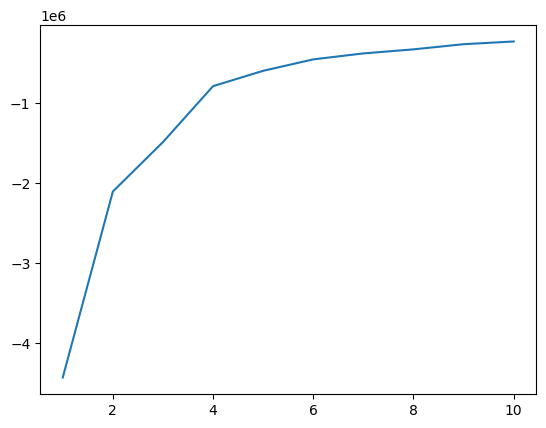

In [67]:
# seperate rows where cabin value has duplicate (like 'C23 C25 C27') seperate into duplicate rows but with each cabin value as one of the 3
# then convert cabin values to numeric (maybe A=100, B=200, etc..) then add on the numbers after the letter and plot a scatterplot

# X = [ [Cabin, Fare], [Cabin, Fare], etc.. ]
X = []
# done like this so we can play around with the letter transformations
char_transf = {'A': 100, 'B': 200, 'C': 300, 'D': 400, 'E': 500, 'F': 600, 'G':700, 'T': 800}

x = []
y = []

for cabin_val in train['Cabin'].unique():
    # check if cabin_val == NaN (as only NaN cant be compared to itself)
    if cabin_val != cabin_val:
        continue
        
        
    fare_sum = train.loc[train['Cabin']==cabin_val].Fare.sum()
    passenger_count = len(train[train['Cabin']==cabin_val])
    fare_mean = fare_sum / passenger_count
    
    multi_cabin = cabin_val.split(" ")
    if len(multi_cabin) > 1:
        for multi_cabin_val in multi_cabin:
            numeric_cabin = char_transf[multi_cabin_val[0]]
            if len(multi_cabin_val) > 1:
                numeric_cabin += int(multi_cabin_val[1:])
                
            X.append([numeric_cabin, fare_mean])
            x.append(numeric_cabin)
            y.append(fare_mean)
    else:
        numeric_cabin = char_transf[cabin_val[0]]
        if len(cabin_val) > 1:
            numeric_cabin += int(cabin_val[1:])
        X.append([numeric_cabin, fare_mean])
        x.append(numeric_cabin)
        y.append(fare_mean)
    
    #print(f'Cabin: {cabin_val}, Fare Mean: {fare_mean}, Passenger count: {passenger_count}')
    
#print(X)



# k_clusters = [ {'k': k, 'centers': center, 'labels': [labels] } ]
k_clusters = []
k_scores = []
# attempting k values 1-10 and returning optimal cluster count    
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    k_clusters.append({'k': k, 'centers': kmeans.cluster_centers_, 'labels': kmeans.labels_})
    kscore = kmeans.score(X)
    k_scores.append(kscore)
    
plt.plot([k for k in range(1, 11)], k_scores)
plt.show()

    
#train['Cabin'] = train['Cabin'].where(train['Cabin'].isnull(), 1).fillna(0).astype(int)

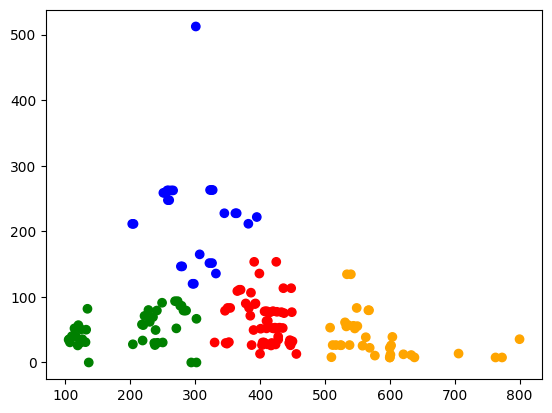

In [68]:
four_dict = k_clusters[3]
colors = ['red', 'green', 'blue', 'orange']
colors_list = [colors[i] for i in four_dict['labels']]

    
plt.scatter(x, y, c=colors_list)
plt.show()

Now we check if there is any significant difference in survival rate between the 4 clusters

In [ ]:
#for each point assign 1 to whichever cluster center its closest to and set the rest to zero

In [18]:
def surv_ratio_graph(df, feature):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
    bins = df[feature].unique()
    bins.sort()

    survived_ratios = []

    #https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca#:~:text=Embarked%20implies%20where%20the%20traveler,the%20rest%20boarded%20from%20Queenstown.
    #https://medium.com/the-owl/plotting-grouped-bar-chart-in-matplotlib-7700e818344f
    bars = []
    bar_width = 0.3
    surv_labels = {"Survived" : "Survived", "Didnt Survive" : "Didnt Survive"}

    for bin_val in bins:
        #ax.bar(x, height, width, bottom, align)
        survived = (df[df[feature]==bin_val]['Survived']==1).sum()
        didnt_survive = (df[df['SibSp']==bin_val]['Survived']==0).sum()
        surv_ratio = survived / (survived + didnt_survive)
        survived_ratios.append(surv_ratio)

        bar_surv = ax[0].bar(bin_val, survived, bar_width, label=surv_labels['Survived'], color = "blue")
        bar_nosurv = ax[0].bar(bin_val+bar_width, didnt_survive, bar_width, label=surv_labels['Didnt Survive'], color="grey")
        surv_labels['Survived'] = "_nolegend_"
        surv_labels['Didnt Survive'] = "_nolegend_"

    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Count')
    ax[0].legend(loc='best')
    ax[0].margins(x=0, y=0.1)

    ax[1].plot(bins, survived_ratios)
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel('% Survived')
    ax[1].margins(x=0, y=0.1)

    plt.show()

7


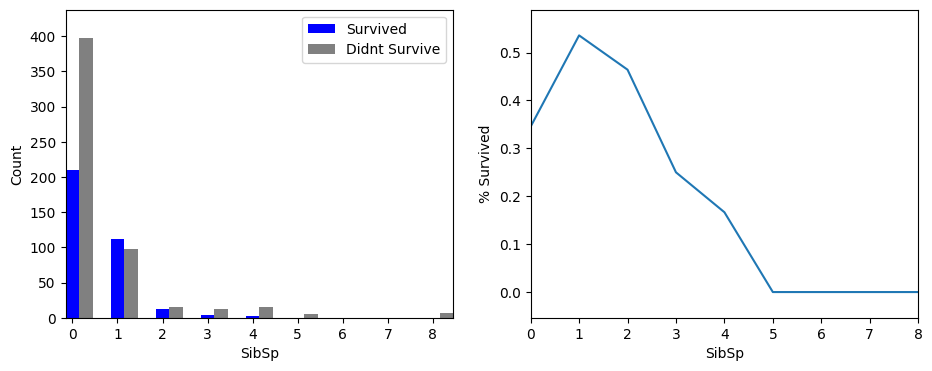

In [19]:
#SibSp - number of siblings/spouses on board
print(train['SibSp'].nunique())
# Since there is only  unique values we can display the survived for each value and see how we can bin these values
# Plotting a bar plot of the count but seperating them into survived and did not survive should give us a visual idea of the total count and the % split of survival

# #https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca#:~:text=Embarked%20implies%20where%20the%20traveler,the%20rest%20boarded%20from%20Queenstown.
# #https://medium.com/the-owl/plotting-grouped-bar-chart-in-matplotlib-7700e818344f

surv_ratio_graph(train, 'SibSp')
   

Looking at the plots above the % ratio for survived seems to simulate a poisson distribution. It would seem that the optimal amount of siblings/spouses to have on board with you to increase your survival rate is 1-2. However, given that the count for values of 1 or greater is much less than that of passengers with a SibSp of zero it cannot be assumed that the survival ratio for SibSp of 1 or greater is an accurate representation of the population. 
*Look into central limit theorem for this*
Due to the non-normal distribution, we can sample 10% of the training set to try and get a normal distribution to see what the % of survived is really like for SibSp

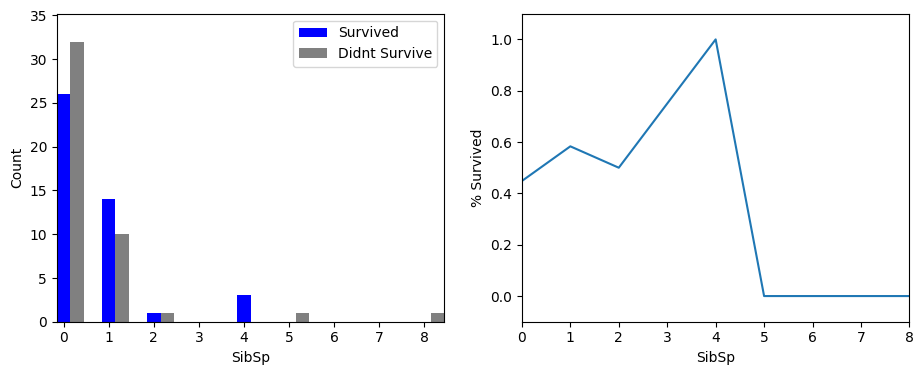

In [20]:
#randomly sample 10% of the training set
sample_train = train.sample(frac=0.1, replace=True)
surv_ratio_graph(sample_train, 'SibSp')


7


/var/folders/y6/161nhsl11ys797vxqdv0p8m40000gq/T/ipykernel_89403/2399194548.py:18: RuntimeWarning: invalid value encountered in long_scalars
  surv_ratio = survived / (survived + didnt_survive)


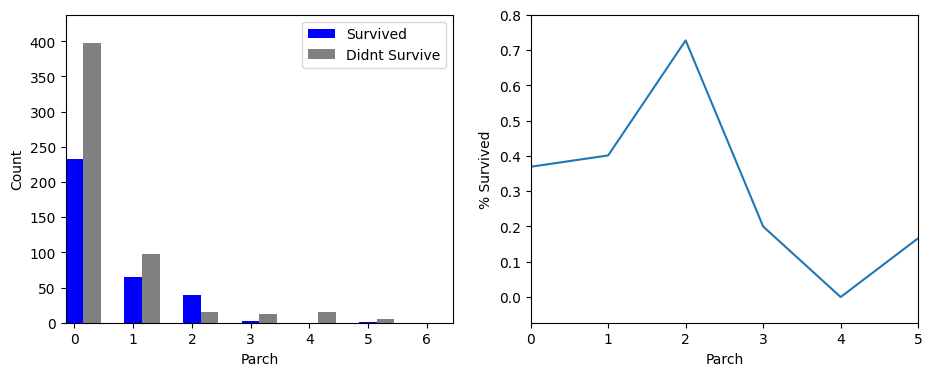

In [21]:
#Parch - Number of Parents/Children Aboard

print(train['Parch'].nunique())
# Since there is only  unique values we can display the survived for each value and see how we can bin these values
# Plotting a bar plot of the count but seperating them into survived and did not survive should give us a visual idea of the total count and the % split of survival

surv_ratio_graph(train, 'Parch')

/var/folders/y6/161nhsl11ys797vxqdv0p8m40000gq/T/ipykernel_89403/2399194548.py:18: RuntimeWarning: invalid value encountered in long_scalars
  surv_ratio = survived / (survived + didnt_survive)


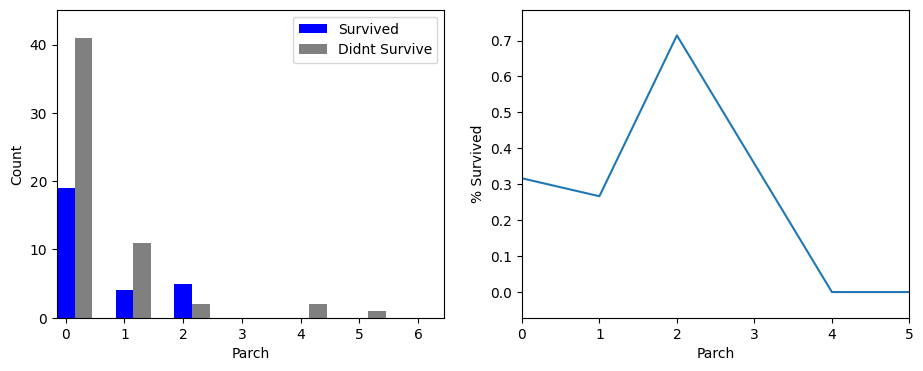

In [22]:
#randomly sample 10% of the training set
sample_train = train.sample(frac=0.1, replace=True)
surv_ratio_graph(sample_train, 'Parch')

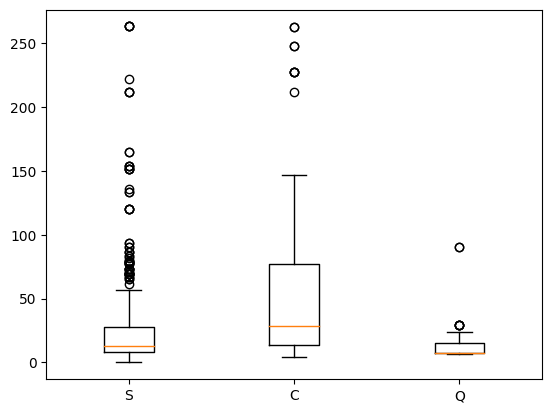

In [139]:
# Since Embarked has only two missing values we can drop the two rows and have almost no impact on our score
#train.dropna(inplace=True)

# for the two missing embarked find their fare and see range of fare for each of the embarked then fill in based on that
train = train[train['Embarked'].notna()]

#Then I will convert embarked into a numerical variable. Im not sure what type of variable Embarked is so I will plot a boxplot of the Fare for each of the embarked variables
# If I see an increasing order then I can classify it as Cardinal and assign a numerical ordered value to each of them
# If there is no significant order between the two then I can assign a categorical binary variable to each value

# from graphing before we see there is a very large outlier with a Fare of above 500 for simplicity sake we will remove this from the training set
train.drop(train[train['Fare'] > 500].index, inplace=True)

emb_labels = []
emb_fares = []
for emb_var in train['Embarked'].unique():
    emb_labels.append(emb_var)
    emb_fare = train[train['Embarked']==emb_var]['Fare']
    emb_fares.append(emb_fare)
    
fig, ax = plt.subplots()
ax.boxplot(emb_fares, labels=emb_labels)
plt.show()

# From this plot we can see that we have 3 embarked variables: S, C, and Q.
# From the boxplot observations it seems that Q has the lowest median line, smallest IQR, and the lowest in general Fare values. S comes in second and C comes in last with the highest Fares
# We can choose either way but I will assign a cardinal ordering of 1 to C, 2 to S, and 3 to Q. Meaning there should be a negative correlation now between Fare and Embarked. (The higher the Fare the lower the expected Embarked value)
train['Embarked'] = train['Embarked'].map({
    "C": 1,
    "S": 2,
    "Q": 3
})

# Trying different method of assigning binary categorical values to embarked to see if get increased lr performance
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(handle_unknown='ignore')

# #perform one-hot encoding on 'team' column 
# encoded_embarked = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray())

# #merge one-hot encoded columns back with original DataFrame
# train = train.join(encoded_embarked)
# train = train.drop(columns=['Embarked'])
# train.head()

In [140]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [141]:
#Assigning binary values to male and female
train['Sex'] = (train['Sex'] == 'male').astype(int)

In [142]:
# I dont think Name or Ticket will have much of an impact on if a person survives so I will drop these columns
# Could maybe assign a score metric to key values in names like seeing if Mrs. has an extra impact over Ms. or Something like ... The Third (III) or Dutches. Something that indicates the person is wealthy
# I think this is overkill so I will drop these two columns as I dont think they will provide a significant amount of extra information to make it worth the effort to convert them into numerical values
train = train.drop(columns=['Name', 'Ticket'])

In [156]:
# Since I think age would play a part in who survives (Children are a priority for saving) I will fill in the missing values with the average of the given ages
# Can experiment with using Linear regression to fill in the age and see if we get better performance

train['Age'] = train['Age'].fillna(train['Age'].mean())

# linr = LinearRegression()

# train_age = train.loc[train['Age'].notnull()]
# train_age_x = train_age.loc[:, train_age.columns != 'Age']
# train_age_y = train_age['Age']

# test_age = train.loc[train['Age'].isna()]
# test_age_x = test_age.loc[:, test_age.columns != 'Age']

# linr.fit(train_age_x, train_age_y)

# predict = linr.predict(test_age_x)

# train.isnull().sum()

# pred_idx = 0
# for i in range(len(train)):
#     if pd.isna(train.loc[train.index[i], 'Age']):
#         train.loc[train.index[i], 'Age'] = predict[pred_idx]
#         pred_idx += 1

# train.isnull().sum()


In [144]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0,2
1,2,1,1,0,38.0,1,0,71.2833,1,1
2,3,1,3,0,26.0,0,0,7.9250,0,2
3,4,1,1,0,35.0,1,0,53.1000,1,2
4,5,0,3,1,35.0,0,0,8.0500,0,2


<Axes: >

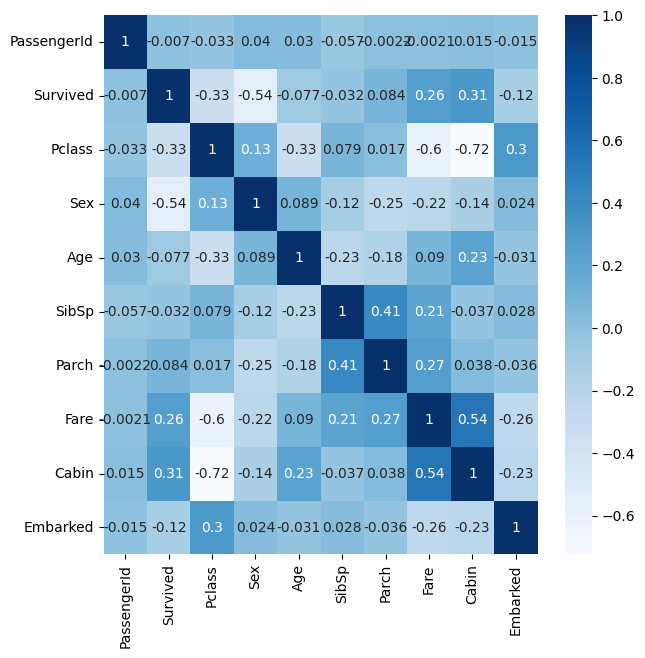

In [145]:
#Create correlation map to see how certain variables affect each other.
#Specifically, how to the independent variables (like Age, Sex, and Fare) affect the target variable (Survived)
#My prediction is that Age will have the most significant contribution to Survived, followed by Sex, and then lastly Fare
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(train.corr(),cbar=True,annot=True,cmap='Blues')

Male survival ratio: 18.61%
Female survival ratio: 73.95%


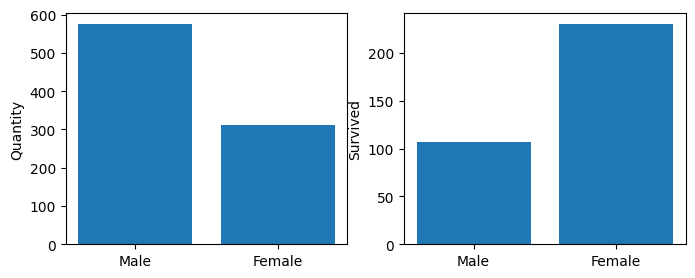

In [146]:
# To my suprise age did not have much of a factor in deciding who survives. 
# The highest contribution to who survives was Sex with a value of -0.54. The negative value means that there is a negative correlation between Sex and Survived
# The negative correlation means that as the value for Sex decreases the value for Survived increases. Since 0 means female for Sex and 1 means the person survived for survived, we can observe that being a women gives you a higher chance of surviving.
# We can observe the difference in survived between sexes using a barplot

gender = ['Male', 'Female']
gender_quantity = [(train['Sex']==1).sum(), (train['Sex']==0).sum()]
gender_survived = [(train[train['Survived']==1]['Sex']==1).sum(), (train[train['Survived']==1]['Sex']==0).sum()]

male_rate = round(((train[train['Survived']==1]['Sex']==1).sum()/(train['Sex']==1).sum())*100, 2)
female_rate = round(((train[train['Survived']==1]['Sex']==0).sum()/(train['Sex']==0).sum())*100, 2)
print('Male survival ratio: '+str(male_rate)+'%')
print('Female survival ratio: '+str(female_rate)+'%')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axes[0].bar(gender, gender_quantity)
axes[1].bar(gender, gender_survived)

axes[0].set_ylabel('Quantity')
axes[1].set_ylabel('Survived')

plt.show()


In [147]:
# After visually seeing the difference in Survived for Sex we can see if there is a difference statistically by doing a Chi-Square Test\n",
# Chi square will show us if Sex is an independent factor for Surviving. It will do this by seeing if there is a statistical difference between the expected rate of female's and male's surviving (a 50% even split) and the actual observed ratio of surivial ratio for sex.
# A statistical difference (at a 5% significance level) means that if Sex had no influence on who survived then we would observe this survival ratio (74.2 woman, 18.89 men) less than 5% of the time.
# Giving us high confidence that this sex survival rate is so rare to observe assuming no influence of sex (male has just as likely of a chance of surviving as a female) that we can say that sex statistically has an influence on if you survive.
# If we reject the null hypothesis by finding a chi-sq value greater than our critical value ( calculated by matching our degrees of freedom (df) with our significance level in a chi squared table)
# df = (rows-1) * (columns -1) = ([male, female].count() - 1) * ([Survived, Didnt Survive].count() -1) = (2-1)*(2-1) = 1*1 = 1
# Therefore our critical value is 3.84146. Meaning we must have a chi square value greater than 3.84 to reject the null hypothesis that Sex is an independent (non influentiual) factor in who survives

#First we calculate our Expected value which is that half of the people that survived are either male or female
expected = train['Survived'].sum() // 2

# Then for male and female we calculate the squared difference of the observed survived count and the expected value
male_sq = (gender_survived[0]-expected)**2
female_sq = (gender_survived[1]-expected)**2

#After we have the squared difference we divide both by the expected value and sum them together to get our chi-sq value
chi_sq = (male_sq/expected) + (female_sq/expected)
print(chi_sq)

# Given that our chi square value is much greater than 5 we can safely reject our null hypothesis at a 5% significance level. 
# (Looking at our table we can even reject the null hypothesis at a 0.5% significance level (cv is ~7.87) giving us even more confidence that sex has an influence on survived)

45.029761904761905


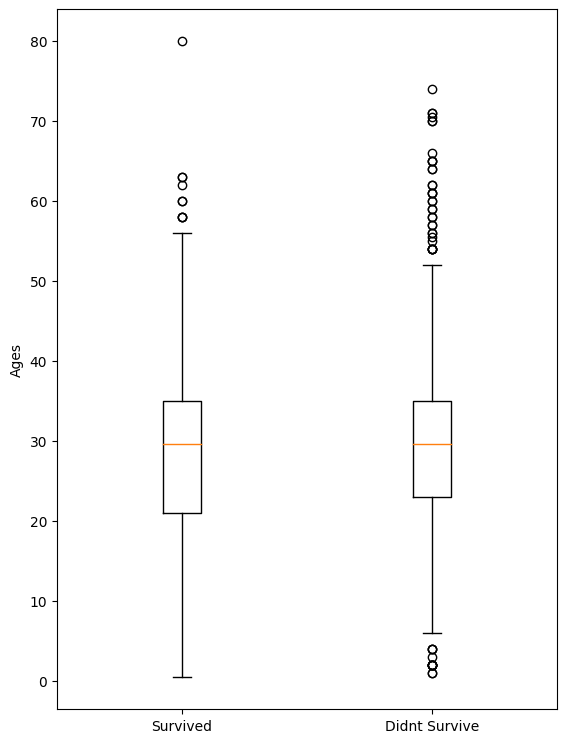

In [148]:
# Plotting a boxplot of ages that survived and didnt may give us a better understanding why age did not have much of a factor in surviving

survived = train[train['Survived']==1]['Age']
null_survived = train[train['Survived']==0]['Age']
survived_ages = [survived, null_survived]

fig = plt.figure(figsize =(5, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
ax.boxplot(survived_ages, labels=['Survived', 'Didnt Survive'])

ax.set_ylabel('Ages')
 
# show plot
plt.show()


<Axes: ylabel='Frequency'>

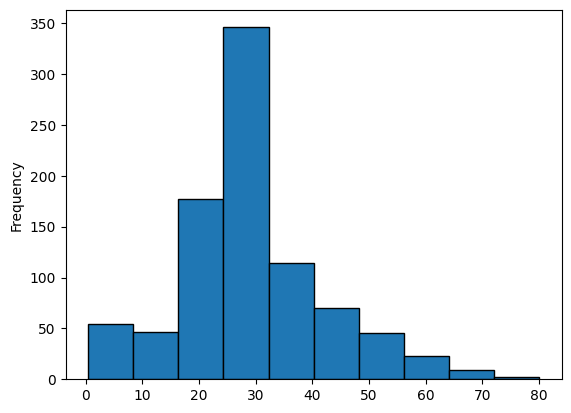

In [149]:
# from the boxplot above it seems like even though the the median line appears to be in the same place the interquartile range appears to be wider for the survived boxplot
# we can observe that the Q3 (the top of the IQR) is at around the same age for both plots with the box for the survived plot stretching down to a younger age with a lower Q1
# The minimum (or bottom whisker) for the survived plot also stretches down to younger ages with the Didnt Survive having the younger ages as outliers
# Given these following observations I can see that younger ages were more likely to survive. (Especially given that the youngest ages that didnt survive are classified as outliers)
# Since Age did not have a significant impact on who survives though, my assumption is that there was not a large difference in ages between people on the ship. Or not enough very young people to notice a significant difference in ages between those that survived and didnt.
# We can observe this through plotting a distribution of the quantity of ages on the training set

train['Age'].plot(kind='hist', edgecolor='black')

# From this above graph we can see that there appears to be a slight right skew on the distribution of Ages on the training set
# Extra information regarding the issue can be found here: https://www.itl.nist.gov/div898/handbook/eda/section3/histogr6.htm
# We might want to transform this data/play around with it when trying to increase our performance. For now we will leave it as is, since it has little effect on our prediction varaible (Survived)

Survival Ratio for Pclass1: 62.09% Pclass2: 47.28% Pclass3: 24.24%
Survival Ratio for Cabin: 66.0% No Cabin: 29.88%


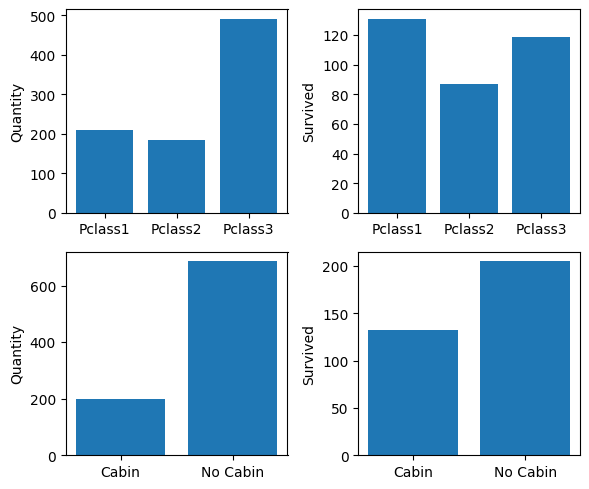

In [150]:
# After Sex, the variable that had the most significant impact on Survived is Pclass.
# Im assuming that Pclass stands for something like "Party class" where people were seperated into seperate classes with the class with the lowest number representing the richest and vice versa
# The variable after that with the most impact was Cabin which im also assuming is really only something the richest passangers could afford
# After Pclass and Cabin comes Fare which is the price the passanger paid to stay on the ship. Im wondering if I could simplify these 3 variables as it seems like they are both dependent on Fare (which can also be observed in the heatmap)

# We can plot a barplot of the 3 Pclasses showing the quantity of Survivers for each
# We can then plot a barplot of Cabin or no Cabin showing the quantity of Survivers for each

pclasses = ['Pclass1', 'Pclass2', 'Pclass3']
pclass_quantities = [(train['Pclass']==1).sum(), (train['Pclass']==2).sum(), (train['Pclass']==3).sum()]
pclass_survived = [(train[train['Pclass']==1]['Survived']==1).sum(), 
                    (train[train['Pclass']==2]['Survived']==1).sum(), 
                     (train[train['Pclass']==3]['Survived']==1).sum()
                    ]

cabins = ['Cabin', 'No Cabin']
cabin_quantities = [(train['Cabin']==1).sum(), (train['Cabin']==0).sum()]
cabin_survived = [(train[train['Cabin']==1]['Survived']==1).sum(), (train[train['Cabin']==0]['Survived']==1).sum()]

pclass1_rate = round((pclass_survived[0]/pclass_quantities[0])*100, 2)
pclass2_rate = round((pclass_survived[1]/pclass_quantities[1])*100, 2)
pclass3_rate = round((pclass_survived[2]/pclass_quantities[2])*100, 2)


cabin_rate = round((cabin_survived[0]/cabin_quantities[0])*100, 2)
no_cabin_rate = round((cabin_survived[1]/cabin_quantities[1])*100, 2)

print(f'Survival Ratio for Pclass1: {str(pclass1_rate)}% Pclass2: {str(pclass2_rate)}% Pclass3: {str(pclass3_rate)}%')
print(f'Survival Ratio for Cabin: {str(cabin_rate)}% No Cabin: {str(no_cabin_rate)}%')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))
axes[0, 0].bar(pclasses, pclass_quantities)
axes[0, 1].bar(pclasses, pclass_survived)
axes[1, 0].bar(cabins, cabin_quantities)
axes[1, 1].bar(cabins, cabin_survived)

axes[0, 0].set_ylabel('Quantity')
axes[0, 1].set_ylabel('Survived')
axes[1, 0].set_ylabel('Quantity')
axes[1, 1].set_ylabel('Survived')
fig.tight_layout()

plt.show()

# From these graphs it is visually observable how much of a difference the higher class passangers had in survival rate
# These graphs visually represent the Survival Ratio values also seen below


In [151]:
# From the visual above we can see there appears to be an influence of cabin and pclass on who survives
# I could perform chi square tests on both pclass and cabin to prove their influence statistically but I will return back to that later
# As of now I am particularly more interested in if there is a increase in influence if a passanger has a combined pclass and cabin
# Basically I would like to see if both of these variables are needed or if one is redundant as my guess is that both cabin and a low pclass can be infered with a high fare value
# I will perform a chi square test for each of the 3 pclasses to see if having a cabin as well influences your survival

# we expect cabin to have no influence on if you survive (given that you are in pclass1) therefore it is an even split (not sure if even split maybe less than 50% of people can have cabin so check that)
# expected_pclass1 = (train[train['Pclass']==1]['Survived']==1).sum() // 2

# # the observed survival count of those in pclass1 that survived and had a cabin
# observed_pclass1_cabin = len(train[ (train['Cabin']==1) & (train['Pclass']==1) & (train['Survived']==1) ])

# # the observed survival count of those in pclass1 that survived and didnt have a cabin
# observed_pclass1_nocabin = len(train[ (train['Cabin']==0) & (train['Pclass']==1) & (train['Survived']==1) ])

# pclass1_cabin_sq = (observed_pclass1_cabin - expected_pclass1)**2
# pclass1_nocabin_sq = (observed_pclass1_nocabin - expected_pclass1)**2

# pclass1_chi_sq = (pclass1_cabin_sq / expected_pclass1) + (pclass1_nocabin_sq / expected_pclass1)

# print(pclass1_chi_sq)


# First get the count of people in pclass1 that survived
# then get the count of people in pclass1 that survived that also had a cabin
# divide that by the amount of pclass1 people that had a cabin
# repeat the above for pclass2 and 3 and compare the ratios


for i in range(1, 4):
    pclassi = (train['Pclass']==i).sum()
    pclassi_survived = (train[train['Pclass']==i]['Survived']==1).sum()
    pclassi_cabin_survived =  len(train[ (train['Cabin']==1) & (train['Pclass']==i) & (train['Survived']==1) ])
    pclassi_no_cabin_survived = len(train[ (train['Cabin']==0) & (train['Pclass']==i) & (train['Survived']==1) ])
    pclassi_cabin = (train[train['Pclass']==i]['Cabin']==1).sum()
    pclassi_no_cabin = (train[train['Pclass']==i]['Cabin']==0).sum()
    
    print(f"pclass{i}: {pclassi}")
    print(f"pclass{i} survived: {pclassi_survived}")
    print(f"pclass{i} cabin: {pclassi_cabin}")
    print(f"pclass{i} cabin survived: {pclassi_cabin_survived}")
    print(f"pclass{i} cabin ratio: {round((pclassi_cabin/pclassi)*100, 2)}%")
    print(f"pclass{i} cabin survived ratio: {round((pclassi_cabin_survived/pclassi_cabin)*100, 2)}%")
    print(f"pclass{i} no cabin survived ratio: {round((pclassi_no_cabin_survived/pclassi_no_cabin)*100, 2)}%")
    print("\n")



# This is tough to analyze. From pclass 3 we see that less than 25% of passangers had a cabin, however 50% of the pclass3 passangers that had a cabin survived. 
# This is double the probability in survival which would make you think that cabin does have an influence in surviving, 
# But we have to take in the fact that only around 2.5% of pclass3 passangers had a cabin so the 50% ratio could just be from random chance since the pclass3 cabin sample size is too small.
# The same can be said for pclass2 passangers with a cabin.


# expected out of 176 that have cabin should survive at same rate of those that didnt have cabin. Cant really test this as there are very little pclass1 passangers that didnt have a cabin therefore the small sample size wont be significant enough to see population representive data
# (maybe find some calculation that takes into account sample size so those with cabin and those without cabin have same value/impact even though diff sample size)

pclass1: 211
pclass1 survived: 131
pclass1 cabin: 172
pclass1 cabin survived: 113
pclass1 cabin ratio: 81.52%
pclass1 cabin survived ratio: 65.7%
pclass1 no cabin survived ratio: 46.15%


pclass2: 184
pclass2 survived: 87
pclass2 cabin: 16
pclass2 cabin survived: 13
pclass2 cabin ratio: 8.7%
pclass2 cabin survived ratio: 81.25%
pclass2 no cabin survived ratio: 44.05%


pclass3: 491
pclass3 survived: 119
pclass3 cabin: 12
pclass3 cabin survived: 6
pclass3 cabin ratio: 2.44%
pclass3 cabin survived ratio: 50.0%
pclass3 no cabin survived ratio: 23.59%




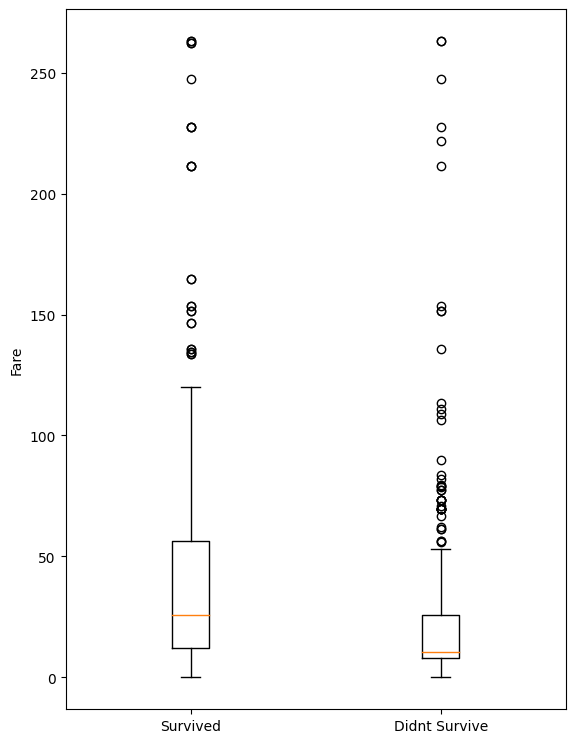

In [152]:
# Adding a boxplot of Survived points vs their Fare value to see how much of a difference (or significance of fare) is observable

# removing one large outlier that made the boxplots small
trimmed_train = train.drop(train[train['Fare'] > 500].index)

survived = trimmed_train[trimmed_train['Survived']==1]['Fare']
null_survived = trimmed_train[trimmed_train['Survived']==0]['Fare']
survived_fairs = [survived, null_survived]

fig = plt.figure(figsize =(5, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
ax.boxplot(survived_fairs, labels=['Survived', 'Didnt Survive'])

ax.set_ylabel('Fare')
 
# show plot
plt.show()


In [153]:
test_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [154]:
train_x = train.loc[:, train.columns != "Survived"]
train_y = train["Survived"]
test_x = test_x.drop(columns=['Name', 'Ticket'])
test_x['Cabin'] = test_x['Cabin'].where(test_x['Cabin'].isnull(), 1).fillna(0).astype(int)
test_x['Sex'] = (test_x['Sex'] == 'male').astype(int)
test_x['Age'] = test_x['Age'].fillna(test_x['Age'].mean())
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].mean())
test_x['Embarked'] = test_x['Embarked'].map({
    "C": 1,
    "S": 2,
    "Q": 3
})

test_y = test["Survived"]

test_x.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [155]:
# From the Fare boxplots it can be observed that having a larger Fare had a significant impact on Surviving
# Firstly from the fact that the median line for Survived has a larger Fare value
# Second from the fact that the IQR for Survived reaches to a much higher Fare value 
# The median line for Survived is at about the same Fare value as Q3 for the Didnt Survive boxplot. This means that more than 50% of the people that survived had a higher Fare value than 75% of the people that didnt survive
# Another noticable point in the graph is that any point above a Fare of around 50 is considered as an outlier for Didnt Survive. This is significant evidence that those with a higher fare value are statistically supposed to survive and it is seen as an outlier in the dataset if they dont

# I would like to observe how dependent pclass and cabin are on Fare to see if pclass and/or cabin provide any extra information (or impact on survived) that fare doesnt
# Not sure exactly how to statistically test for this but for now I will do two logistic regression models one with cabin and one without cabin
# I will perform a couple of random attempts to see if there is a significant difference in performance between the two


from sklearn.linear_model import LogisticRegression

logir = LogisticRegression(max_iter=1000)

logir.fit(train_x, train_y)

train_predictions = logir.predict(train_x)
test_predictions = logir.predict(test_x)

train_score = logir.score(train_x, train_y)
test_score = logir.score(test_x, test_y)

print(train_score)
print(test_score)

#embarked w/ cardinal got train: 80.5%, test: 93.7%
# when embarked replaced with 3 columns each with binary 0 or 1 value for if has this embarked type train: 80.5%, test: 36.6%
# age.fillna with age.mean() replaced with linear regression on age get train: 81.8%, test: 91.6%
# strange that test score is better than training score when lr model is trained/fit on the training set


0.8069977426636569
0.9401913875598086
